### Importación de datos



In [3]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"


#Aqui se puestra la visualización de las urls con los datos de cada tienda, el .read_csv(url)
#lo que hace el read_csv
'''
"Oye, pandas (pd), por favor, utiliza tu función especializada para leer archivos CSV (.read_csv())
y carga los datos que se encuentran en el archivo llamado 'nombre_del_archivo.csv' en un DataFrame."

'''
tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)


tienda4.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Lavavajillas,Electrodomésticos,1084800.0,56000.0,11/11/2022,Rafael Acosta,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175
1,Cama box,Muebles,473800.0,25400.0,03/01/2020,Izabela de León,Cúcuta,5,Tarjeta de crédito,2,7.89391,-72.50782
2,Balón de baloncesto,Deportes y diversión,23700.0,0.0,25/12/2022,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
3,Modelado predictivo,Libros,57700.0,1300.0,23/11/2021,Lucas Olivera,Medellín,3,Nequi,1,6.25184,-75.56359
4,Auriculares,Electrónicos,138900.0,5600.0,25/04/2022,Blanca Ramirez,Bogotá,4,Tarjeta de crédito,7,4.60971,-74.08175


#1. Análisis de facturación



In [4]:
#Ingreso total por tienda
#con el read ya realizado, tenemos acceso a los elementos del archivo
#y tb a los data frame, que en este caso serían los productos, Categoria, etc.

#.astype(float)es un método de panda que convierte el tipo de dato contenido en Precio
# en número y ademas con decimales (float), de lo contrario sería en entero (int)

#.sum() suma los numeros contenidos en el df Precio

ingreso_total_tienda1 = tienda1['Precio'].astype(float).sum()
ingreso_total_tienda2 = tienda2['Precio'].astype(float).sum()
ingreso_total_tienda3 = tienda3['Precio'].astype(float).sum()
ingreso_total_tienda4 = tienda4['Precio'].astype(float).sum()



#Aqui con formato le pido que me separe en miles con una (,) y que tenga 2 decimales

print(f'El ingreso total de la tienda 1 es de ${ingreso_total_tienda1:,.2f}')
print(f'El ingreso total de la tienda 2 es de ${ingreso_total_tienda2:,.2f}')
print(f'El ingreso total de la tienda 3 es de ${ingreso_total_tienda3:,.2f}')
print(f'El ingreso total de la tienda 1 es de ${ingreso_total_tienda1:,.2f}')

print(f'\nEl ingreso total de las 4 tiendas es de ${ingreso_total_tienda1+ingreso_total_tienda2+ingreso_total_tienda3+ingreso_total_tienda4:,.2f}')

El ingreso total de la tienda 1 es de $1,150,880,400.00
El ingreso total de la tienda 2 es de $1,116,343,500.00
El ingreso total de la tienda 3 es de $1,098,019,600.00
El ingreso total de la tienda 1 es de $1,150,880,400.00

El ingreso total de las 4 tiendas es de $4,403,619,200.00


# 2. Ventas por categoría

In [5]:
'''
Calcular la cantidad de productos vendidos por categoría en cada tienda.
La idea es agrupar los datos por categoría y contar el número de ventas de cada
 tipo, mostrando las categorías más populares de cada tienda.
'''


#Creamos la función 'ventas_por_categorias' que tine 2 argumentos: tienda (url de la tienda
# en particular y el número que aparecerá en print

def ventas_por_categoria(tienda, numero):
#En la función tengo una variabla 'ventas' que toma el argumento tienda y lo agrupa
#según el df que eliga, en este caso, agrupa la categoria del producto
#con su precio y lo suma
    ventas = tienda.groupby('Categoría del Producto')[f'Precio'].sum().map('${:,.2f}'.format)
    print(f"\nVentas por categoría en Tienda {numero}:")
    print(ventas)

# Mostrar resultados para cada tienda
ventas_por_categoria(tienda1, 1)
ventas_por_categoria(tienda2, 2)
ventas_por_categoria(tienda3, 3)
ventas_por_categoria(tienda4, 4)


Ventas por categoría en Tienda 1:
Categoría del Producto
Artículos para el hogar     $12,698,400.00
Deportes y diversión        $39,290,000.00
Electrodomésticos          $363,685,200.00
Electrónicos               $429,493,500.00
Instrumentos musicales      $91,299,000.00
Juguetes                    $17,995,700.00
Libros                       $8,784,900.00
Muebles                    $187,633,700.00
Name: Precio, dtype: object

Ventas por categoría en Tienda 2:
Categoría del Producto
Artículos para el hogar     $14,746,900.00
Deportes y diversión        $34,744,500.00
Electrodomésticos          $348,567,800.00
Electrónicos               $410,831,100.00
Instrumentos musicales     $104,990,300.00
Juguetes                    $15,945,400.00
Libros                      $10,091,200.00
Muebles                    $176,426,300.00
Name: Precio, dtype: object

Ventas por categoría en Tienda 3:
Categoría del Producto
Artículos para el hogar     $15,060,000.00
Deportes y diversión        $35,593,100

In [6]:
#las 3 categorias que mejore se venden en las tiendas

def top_3_ventas_por_categoria(tienda, numero):
    ventas_por_categoria = tienda.groupby('Categoría del Producto')['Precio'].sum()

    # Ordena las ventas de mayor a menor
    ventas_ordenadas = ventas_por_categoria.sort_values(ascending=False)

    # Toma las 3 categorías principales
    top_3_ventas = ventas_ordenadas.head(3)

    print(f"\nTop 3 Ventas por Categoría en Tienda {numero}:")
    for categoria, total_venta in top_3_ventas.items():
        print(f"{categoria}: ${total_venta:,.2f}")

# Mostrar el top 3 para cada tienda
# (Asegúrate de que tienda1, tienda2, tienda3, tienda4 estén definidos como DataFrames)
top_3_ventas_por_categoria(tienda1, 1)
top_3_ventas_por_categoria(tienda2, 2)
top_3_ventas_por_categoria(tienda3, 3)
top_3_ventas_por_categoria(tienda4, 4)


Top 3 Ventas por Categoría en Tienda 1:
Electrónicos: $429,493,500.00
Electrodomésticos: $363,685,200.00
Muebles: $187,633,700.00

Top 3 Ventas por Categoría en Tienda 2:
Electrónicos: $410,831,100.00
Electrodomésticos: $348,567,800.00
Muebles: $176,426,300.00

Top 3 Ventas por Categoría en Tienda 3:
Electrónicos: $410,775,800.00
Electrodomésticos: $329,237,900.00
Muebles: $201,072,100.00

Top 3 Ventas por Categoría en Tienda 4:
Electrónicos: $409,476,100.00
Electrodomésticos: $283,260,200.00
Muebles: $192,528,900.00


In [7]:
#los 3 mejores vendedores por tienda y sus ventas
def top_3_vendedores(tienda, numero):
    # Agrupa por vendedor y suma el total de sus ventas
    ventas_por_vendedor = tienda.groupby('Vendedor')['Precio'].sum()

    # Ordena los vendedores por sus ventas totales de mayor a menor
    vendedores_ordenados = ventas_por_vendedor.sort_values(ascending=False)

    # Toma los 3 mejores vendedores
    top_3_vendedores = vendedores_ordenados.head(3)

    print(f"\nTop 3 Vendedores en Tienda {numero}:")
    for vendedor, total_venta in top_3_vendedores.items():
        print(f"{vendedor}: ${total_venta:,.2f}")


top_3_vendedores(tienda1, 1)
top_3_vendedores(tienda2, 2)
top_3_vendedores(tienda3, 3)
top_3_vendedores(tienda4, 4)


Top 3 Vendedores en Tienda 1:
Maria Alfonso: $101,528,700.00
Rafael Acosta: $96,271,300.00
Izabela de León: $93,776,500.00

Top 3 Vendedores en Tienda 2:
Izabela de León: $91,812,200.00
Pedro Gomez: $90,140,400.00
Felipe Santos: $87,861,800.00

Top 3 Vendedores en Tienda 3:
Maria Alfonso: $96,328,500.00
Juliana Costa: $86,070,600.00
Camila Rivera: $82,385,700.00

Top 3 Vendedores en Tienda 4:
Felipe Santos: $95,432,000.00
Juan Fernandez: $86,497,500.00
Izabela de León: $82,612,700.00


## 3. Calificación promedio de la tienda


In [8]:
#conocer la satisfacción del cliente con los productos vendidos.

def clasificacion_promedio(tienda, numero):
    promedio = tienda['Calificación'].mean()
    print(f"Clasificación promedio en Tienda {numero}: {promedio:.2f}")

# Mostrar resultados para cada tienda
clasificacion_promedio(tienda1, 1)
clasificacion_promedio(tienda2, 2)
clasificacion_promedio(tienda3, 3)
clasificacion_promedio(tienda4, 4)

Clasificación promedio en Tienda 1: 3.98
Clasificación promedio en Tienda 2: 4.04
Clasificación promedio en Tienda 3: 4.05
Clasificación promedio en Tienda 4: 4.00


# 4. Productos más y menos vendidos

In [16]:
def analisis_productos_con_ingresos(tienda, numero, top_n=5, bottom_n=5):
    # Agrupa por nombre del producto y calcula la frecuencia y la suma del precio
    analisis_productos = tienda.groupby('Producto').agg(
        Cantidad_Vendida=('Producto', 'count'),
        Ingresos_Totales=('Precio', 'sum')
    )

    # Ordenar por cantidad vendida (para encontrar los más y menos vendidos en frecuencia)
    productos_mas_vendidos_cantidad = analisis_productos.sort_values(by='Cantidad_Vendida', ascending=False).head(top_n)
    productos_menos_vendidos_cantidad = analisis_productos.sort_values(by='Cantidad_Vendida', ascending=True).head(bottom_n)

    print(f"\nLos {top_n} productos más vendidos en la tienda {numero} son:\n")
    for producto, data in productos_mas_vendidos_cantidad.iterrows():
        print(f"- {producto}: {int(data['Cantidad_Vendida'])} ventas. Ingresos totales: ${data['Ingresos_Totales']:,.2f}")

    print(f"\nLos {bottom_n} productos menos vendidos en la tienda {numero} son:\n")
    for producto, data in productos_menos_vendidos_cantidad.iterrows():
        print(f"- {producto}: {int(data['Cantidad_Vendida'])} ventas, Ingresos Totales: ${data['Ingresos_Totales']:,.2f}")

# Mostrar el análisis para cada tienda

analisis_productos_con_ingresos(tienda1, 1)
print('______________________________________________________________________')
analisis_productos_con_ingresos(tienda2, 2)
print('______________________________________________________________________')
analisis_productos_con_ingresos(tienda3, 3)
print('______________________________________________________________________')
analisis_productos_con_ingresos(tienda4, 4)


Los 5 productos más vendidos en la tienda 1 son:

- Armario: 60 ventas. Ingresos totales: $29,462,300.00
- TV LED UHD 4K: 60 ventas. Ingresos totales: $142,150,200.00
- Microondas: 60 ventas. Ingresos totales: $34,761,500.00
- Secadora de ropa: 58 ventas. Ingresos totales: $59,062,400.00
- Mesa de noche: 56 ventas. Ingresos totales: $15,679,600.00

Los 5 productos menos vendidos en la tienda 1 son:

- Auriculares con micrófono: 33 ventas, Ingresos Totales: $4,730,800.00
- Celular ABXY: 33 ventas, Ingresos Totales: $32,651,000.00
- Olla de presión: 35 ventas, Ingresos Totales: $2,629,300.00
- Pandereta: 36 ventas, Ingresos Totales: $2,238,900.00
- Ciencia de datos con Python: 39 ventas, Ingresos Totales: $2,063,600.00
______________________________________________________________________

Los 5 productos más vendidos en la tienda 2 son:

- Iniciando en programación: 65 ventas. Ingresos totales: $3,127,800.00
- Microondas: 62 ventas. Ingresos totales: $36,192,000.00
- Batería: 61 ventas

# 5. Envío promedio por tienda

In [ ]:
#costo de envío promedio para cada tienda. El objetivo es comprender cuánto se
#gasta, en promedio, en el envío de cada tienda.

def promedio_costo_envio_por_tienda(tienda, numero):
    # Calcula el promedio de la columna 'Costo de envío'
    promedio_envio = tienda['Costo de envío'].mean()
    print(f"El promedio del costo de envío en la Tienda {numero} es: ${promedio_envio:,.2f}")

# Calcular el promedio para cada tienda

promedio_costo_envio_por_tienda(tienda1, 1)
promedio_costo_envio_por_tienda(tienda2, 2)
promedio_costo_envio_por_tienda(tienda3, 3)
promedio_costo_envio_por_tienda(tienda4, 4)

El promedio del costo de envío en la Tienda 1 es: $26,018.61
El promedio del costo de envío en la Tienda 2 es: $25,216.24
El promedio del costo de envío en la Tienda 3 es: $24,805.68
El promedio del costo de envío en la Tienda 4 es: $23,459.46


- Recomendaciones en base al análisis. Si hay que cerrar alguna tienda, la que tiene menos ventas es la tienda 4. Sin embargo, los mejores vendedores de la tienda 4 están al nivel de ventas de las otras tiendas, por tanto, consideraría incorporarlos en las tiendas que no se venderan.
Asi mismo, las calificaciones de la tienda con mayores ventas, es menor al resto de las tiendas. Una de las razones de esas menores calificaciones puede ser la alta afluencia de público y que los vendedores tengan algun tipo de estres. Con lo cual, recomendaría incorporar nuevos trabajadores o realizar algun tipo de coaching motivacional a los trabajadores para mejorar el bienestar laboral

# GRÁFICOS

1. Grafico de barras para representar el ingreso total por tienda

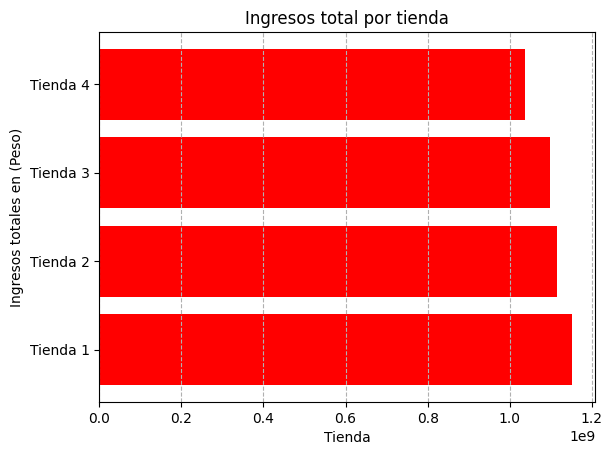

In [28]:
import matplotlib.pyplot as plt

tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos = ingresos = [tienda1['Precio'].astype(float).sum(),
            tienda2['Precio'].astype(float).sum(),
            tienda3['Precio'].astype(float).sum(),
            tienda4['Precio'].astype(float).sum()]

plt.barh(tiendas, ingresos, color='red')
plt.xlabel('Tienda')
plt.ylabel('Ingresos totales en (Peso)')
plt.title('Ingresos total por tienda')
plt.grid(axis='x', linestyle='--') # Opcional: agregar una cuadrícula horizontal
plt.show()

2. Gráfico que representa la distribución de venta por categroía de producto

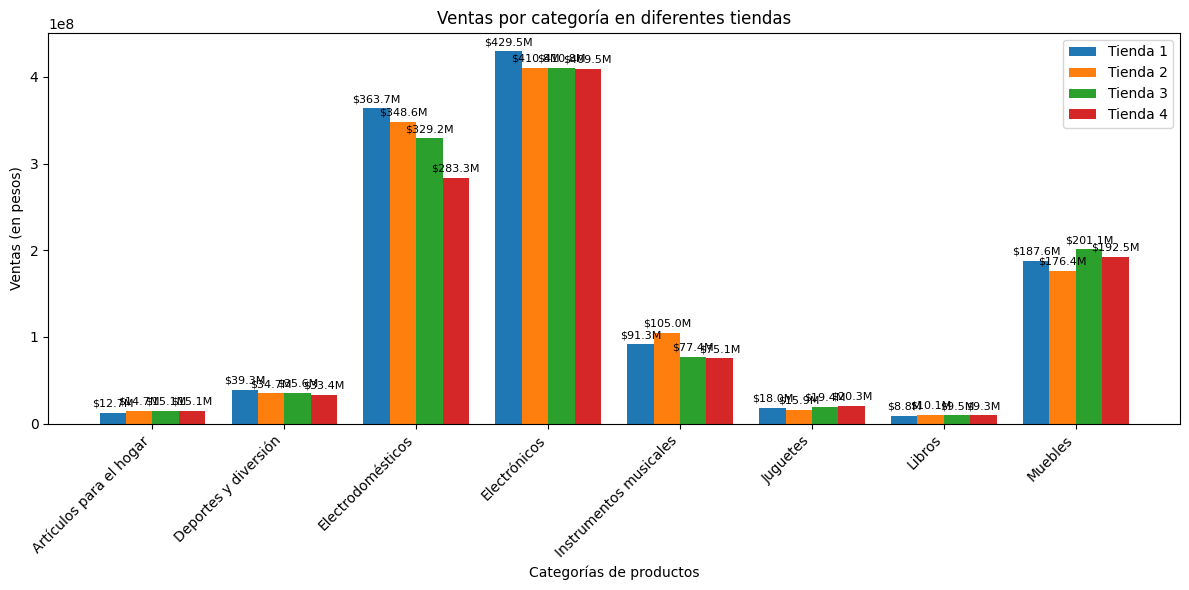

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ventas por categoría para cada tienda
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
categorias = ['Artículos para el hogar', 'Deportes y diversión', 'Electrodomésticos',
              'Electrónicos', 'Instrumentos musicales', 'Juguetes', 'Libros', 'Muebles']
ventas = np.array([
    [12698400, 14746900, 15060000, 15074500],  # Artículos para el hogar
    [39290000, 34744500, 35593100, 33350100],  # Deportes y diversión
    [363685200, 348567800, 329237900, 283260200], # Electrodomésticos
    [429493500, 410831100, 410775800, 409476100], # Electrónicos
    [91299000, 104990300, 77380900, 75102400],  # Instrumentos musicales
    [17995700, 15945400, 19401100, 20262200],  # Juguetes
    [8784900, 10091200, 9498700, 9321300],   # Libros
    [187633700, 176426300, 201072100, 192528900]  # Muebles
])

# Ancho de cada barra
ancho = 0.2

# Posiciones de las barras para cada tienda
posiciones = np.arange(len(categorias))
posiciones_tienda1 = posiciones - 1.5 * ancho
posiciones_tienda2 = posiciones - 0.5 * ancho
posiciones_tienda3 = posiciones + 0.5 * ancho
posiciones_tienda4 = posiciones + 1.5 * ancho

# Crear el gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(12, 6)) # Ajusta el tamaño de la figura si es necesario

rects1 = ax.bar(posiciones_tienda1, ventas[:, 0], ancho, label=tiendas[0])
rects2 = ax.bar(posiciones_tienda2, ventas[:, 1], ancho, label=tiendas[1])
rects3 = ax.bar(posiciones_tienda3, ventas[:, 2], ancho, label=tiendas[2])
rects4 = ax.bar(posiciones_tienda4, ventas[:, 3], ancho, label=tiendas[3])

# Añadir etiquetas y título
ax.set_xlabel('Categorías de productos')
ax.set_ylabel('Ventas (en pesos)') # Ajusta la unidad si es necesario
ax.set_title('Ventas por categoría en diferentes tiendas')
ax.set_xticks(posiciones)
ax.set_xticklabels(categorias, rotation=45, ha='right')
ax.legend()

# Añadir etiquetas de valor en las barras (opcional)
def autolabel(rects):
    """Adjunta una etiqueta de texto encima de cada barra mostrando su altura."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'${height/1e6:.1f}M', # Formatea el valor como millones
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Desplazamiento vertical
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout() # Ajusta el espaciado para evitar etiquetas superpuestas
plt.show()

3. Gráfico que representa el costo promedio de envio por cada tienda

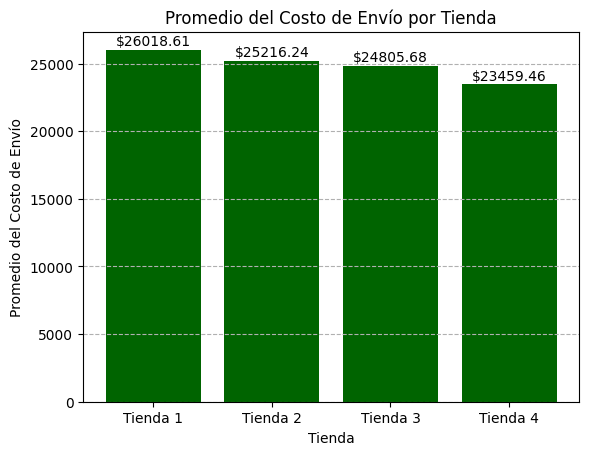

In [40]:
import matplotlib.pyplot as plt

tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
promedios_envio = [26018.61, 25216.24, 24805.68, 23459.46]

plt.bar(tiendas, promedios_envio, color='darkgreen') # Puedes elegir el color que prefieras
plt.xlabel('Tiendas')
plt.ylabel('Promedio del costo de envío')
plt.title('Promedio del costo de envío por tienda')
plt.grid(axis='y', linestyle='--') # Opcional: agregar una cuadrícula horizontal

# Añadir etiquetas de valor en las barras (opcional)
for i, v in enumerate(promedios_envio):
    plt.text(i, v + 100, f'${v:.2f}', ha='center', va='bottom')

plt.show()

# INFORME FINAL

Recomendaciones en base al análisis.

Si hay que cerrar alguna tienda, la que tiene menos ventas es la tienda 4.

Sin embargo, los mejores vendedores de la tienda 4 están al nivel de ventas de las otras tiendas, por tanto, consideraría incorporarlos en las tiendas que no se venderan.
Asi mismo, las calificaciones de la tienda con mayores ventas, es menor al resto de las tiendas. Una de las razones de esas menores calificaciones puede ser la alta afluencia de público y que los vendedores tengan algun tipo de estres. Con lo cual, recomendaría incorporar nuevos trabajadores o realizar algun tipo de coaching motivacional a los trabajadores para mejorar el bienestar laboral